In [1]:

%%capture
# في هذا السطر يتم استيراد المكتبة التي تستخدم في الرسومات البيانية وتصوير البيانات
import matplotlib.pyplot as plt # used for visualization  

#في هذ السطر يتم استيراد دالة listdir من المكتبة os ووظيفة الدالة هو الحصول على قائمة بمحتويات دليل محدد 
from os import listdir # used to list the contents of a directory

# في هذا السطر يتم تثبيت مكتبة scikit-image باستخدام الامر pip
!pip install scikit-image # used for image manipulation

# تستخدم هذه الخطوة لاستيراد دالة  imread من مكتبة skimage.io.  هذه الدالة تستخدم لقراءة ملف صورة.
from skimage.io import imread # used to read a raw image file (e.g. png or jpg)

# تستخدم هذه الخطوة لاستيراد دالة   resize من مكتبة skimage.transform.   هذه الدالة تستخدم لتغيير حجم الصورة.
from skimage.transform import resize # used to resize images

# تستخدم هذه الخطوة لاستيراد img_as_ubyte من مكتبة skimage. هذه الدالة تستخدم لتحويل صورة إلى تنسيق "unsigned byte".
# used to convert an image to the "unsigned byte" format
from skimage import img_as_ubyte

In [2]:
"""
في هذا الجزء من التدريب نقوم باستيراد  نقوم بكتابة التعليمات البرمجية والخوارزميات التي تقوم بقراءة الصور الموجودة في (مجلد المدخلات) وتغيير حجمها لتكون 
لها نفس الأبعاد حيث أن خوارزميات التعلم الموجه تتطلب أن تكون كل الصور لها نفس الأبعاد
"""

def resize_images(input_folder: str, width: int, height: int):
    """
    تغيير حجم الصور في مجلد محدد إلى العرض والارتفاع المحددين.

    المتغيرات:
    - input_folder: المسار إلى المجلد الذي يحتوي على مجلدات فرعية تحتوي على الصور.
    - width: العرض المستهدف لتغيير الحجم.
    - height: الارتفاع المستهدف لتغيير الحجم.

    العودة:
    - resized_images: قائمة بالصور المغيرة في الحجم.
    - labels: قائمة بالتسميات المتعلقة بمجلدات الصور.
    - filenames: قائمة بأسماء الملفات المتعلقة بالصور المغيرة في الحجم.
    """
    # قوائم لتخزين المعلومات
    labels = []  # قائمة لتخزين التسميات
    resized_images = []  # قائمة لتخزين الصور المغيرة في الحجم
    filenames = []  # قائمة لتخزين أسماء الملفات

    # حلقة تستخدم للدوران  على المجلدات الفرعية في المجلد المحدد
    for subfolder in listdir(input_folder):
        print(subfolder)
        # بناء المسار إلى المجلد الفرعي
        path = input_folder + '/' + subfolder

        # حلقة ترارية ضمن الحلقة السابقة تستخدم للدوران على الملفات في المجلد الفرعي
        for file in listdir(path):
            # هناك ملفات خاطئة يتم تجاهل ملفات Thumbs.db
            if not file.endswith('.db'):
                # قراءة الصورة وتغيير حجمها
                image = imread(path + '/' + file)
                resized = img_as_ubyte(resize(image, (width, height)))

                # استخراج التسمية، والصورة المغيرة في الحجم، واسم الملف
                labels.append(subfolder[:-4])  # إزالة امتداد  من تسمية الصورة
                resized_images.append(resized)
                filenames.append(file)

    # إرجاع القوائم التي تحتوي على الصور المغيرة في الحجم، والتسميات، وأسماء الملفات
    return resized_images, labels, filenames


In [3]:
# بهذا السطر سنقوم باستيراد الصور مع تسمياتها بدون امتداد الصورة وتغيير أبعادها إلى 100*100 وطباعة قائمة بالمجلدات التي تحوي تلك الصور 
resized_images, labels, filenames = resize_images("AnimalFace/Image", width=100, height=100) # retrieves the images with their labels and resizes them to 100 x 100

BearHead
CatHead
ChickenHead
CowHead
DeerHead
DuckHead
EagleHead
ElephantHead
LionHead
MonkeyHead
Natural
PandaHead
PigeonHead
RabbitHead
SheepHead
TigerHead
WolfHead


(169, 169, 3)

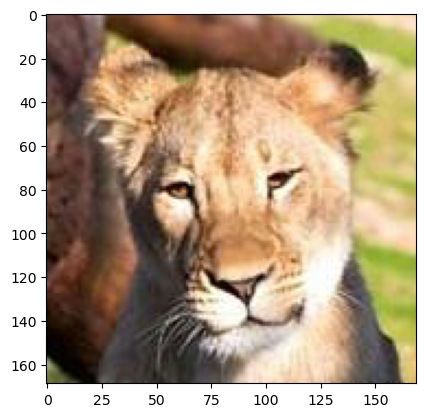

In [4]:
#في هذه الخلية ستتم قراءة صورة محددة من الصور وتخزينها في متغير ومن ثم عرضها وعرض أبعادها  
# reads an image file, stores it in a variabe and
# shows it to the user in a window
image = imread('AnimalFace/Image/LionHead/lioni78.jpg')
plt.imshow(image)
image.shape

In [5]:
#في هذا السطر يتم تحديد البيكسل الأول في الصورة الملونة بالحجم الطبيعي ويطبع قيمه
# the pixel at the first column of the first row
print(image[0][0])

[102  68  66]


In [6]:
#تغيير أبعاد الصورة وتحجيمها واختيار البيكسل الأول في الصورة وطباعتة قيمه بعد إعادة التحجيم
resized = resize(image, (100, 100))
print(resized.shape)
print(resized[0][0])

(100, 100, 3)
[0.40857161 0.27523827 0.26739514]


In [7]:
# في هذا المقطع يتم تحويل تنسيق قيم البيكسل من تنسيق مستند على عدد حقيقي بين الصفر والواحد إلى تنسيق البايت بدون إشارة ومن ثم طباعة قيم البيكسل
resized = img_as_ubyte(resized)
print(resized.shape)
print(resized[0][0])
print(image[0][0])
#نحلاحظ ان قم الالوان في البيكسل المحجم اختلفت اختلاف بسيط عن قيم البيكسل الأصلي وهذا يؤدي إلى صورة أقل وضوحا

(100, 100, 3)
[104  70  68]
[102  68  66]


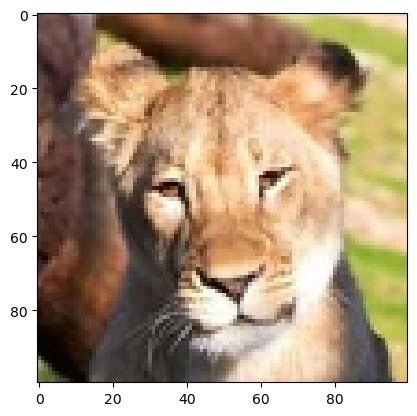

In [8]:
#إضهار الصورة بعد إعادة تحجيمها
# displays the resized image
plt.imshow(resized);

In [9]:
#في هذا الاسطر نتحقق من ان جميع الصور الموجودة في مجموعة البيانات مطابقة للأبعاد 
# يتم ذلك من خلال طباعة أرقام فهرسة الصور التي بها الخلل ويظهر أن هناك صورتان
violations = [index for index in range(len(resized_images)) if
resized_images[index].shape != (100,100,3)]

violations

[455, 1587]

cow1.gif
(100, 100, 4)


Text(0.5, 1.0, 'Cow')

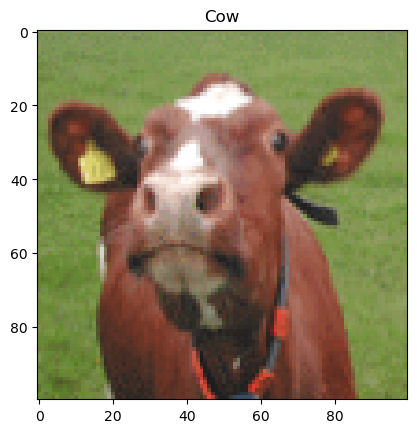

In [10]:
# في هذه التعليمات سيتم عرض الصورتين التي بهما المشاكل وطباعة أبعادها 
pos1 = violations[0]#تخزين الصورة الاولى في متغير أول
pos2 = violations[1]#تخزين الصورة الثانية في متغير ثاني
# هنا في هذه الأسطر سيتم إظهار الصورة الأولى وطباعة أسمها وأبعادها
print(filenames[pos1])
print(resized_images[pos1].shape)
plt.imshow(resized_images[pos1])
plt.title(labels[pos1])
#ستظهر الصوره الأولى ونجد أن لديها اربعة قنوات والقناة الرابعة هي قناة ألفا عبارة عن شفافية البيكسل 

tiger0000000168.jpg
(100, 100)


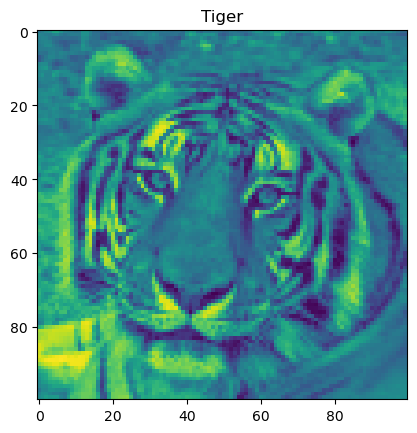

In [11]:
# في هذه التعليمات سيتم عرض الصورة الثانية التي بها المشاكل وعرضها وطباعة اسمها وأبعادها أبعادها
print(filenames[pos2]);
print(resized_images[pos2].shape);
plt.imshow(resized_images[pos2]);
plt.title(labels[pos2]);
#يظهر من خلال اظهار الصورة وأبعادها أن الصوة بتنسيق تدرج الرمادي والتنسيق المظلل أصفر/أزرق طبق بشكل افتراضي من خلال دالة اميج شو
# سنقوم بالغاء التنسيق المظلل في تعليمة برمجة لاحقة لاظهار الصورة على حقيقتها

In [12]:
#في هذه الاسطر سيتم اظهار قيم البيكسل الأول الخص بالصورة الاولى التي بها المشاكل 
# prints the first pixel of the RGBA image
# a value of 255 reveals that the pixel is not transparent at all.
resized_images[pos1][0][0]
#نلاحظ من خلال قيم البيكسل المختار أن له أربع قنوات

array([135, 150,  84, 255], dtype=uint8)

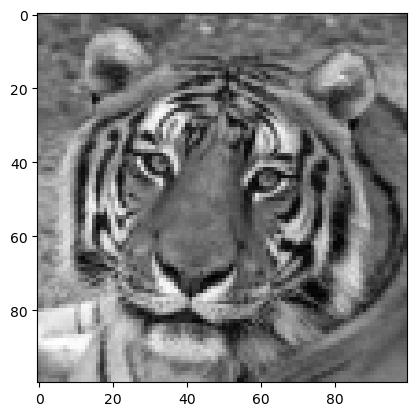

In [13]:
#في هذا السطر سيتم ازالة التنسيق المظلل عن الصورة الثانية واظهرها على حقيقتها لتبدوا بتدرج الرمادي
plt.imshow(resized_images[pos2], cmap = 'gray')

In [14]:
#اظهار قيمة البيسل الأول في الصورة 
resized_images[pos2][0][0]
# نلاحظ أن للبيكسل قيمة واحدة فقط وقناة واحدة التي تمثل درجة اللون الأسود

100

In [15]:
#في هذه الاسطر نجري اختبار اضافي على بيانات الصور ليحسب عدد تكرارعنوان كل صورة حيوان 
# used to count the frequency of each element in a list.
from collections import Counter
label_cnt = Counter(labels)
label_cnt
#من خلال النتائج سنجد أن هناك قيمة متطرفة تختلف عن باقي القيم وهي 8 وتمثل صور طبيعة وبالتلي يجب اسبعادها

Counter({'Cat': 160,
         'Panda': 119,
         'Pigeon': 115,
         'Tiger': 114,
         'Cow': 104,
         'Deer': 103,
         'Duck': 103,
         'Lion': 102,
         'Bear': 101,
         'Eagle': 101,
         'Chicken': 100,
         'Elephant': 100,
         'Monkey': 100,
         'Rabbit': 100,
         'Sheep': 100,
         'Wolf': 100,
         'Nat': 8})

In [16]:
#في هذه التعليمات سيتم استبعاد جميع الصور التي بها مشاكل حتى لا تؤثر في عمل نموذج الذكاء الاصطناعي للتنبؤ
N = len(labels)
resized_images = [resized_images[i] for i in range(N) if i not in violations and labels[i] != "Nat"]
filenames = [filenames[i] for i in range(N) if i not in violations and labels[i] != "Nat"]
labels = [labels[i] for i in range(N) if i not in violations and labels[i] != "Nat"]

In [17]:
#في هذه التعليمات يتم تحولي الصور المعدلة أبعادها وأسماءها إلى مصفوفات  رقمية  
import numpy as np
X = np.array(resized_images)
Y = np.array(labels)
X.shape

(1720, 100, 100, 3)

In [18]:
#في هذه التعليمات سيتم تقسيم البيانات إلى مجموعتين واحدة للتدريب والأخرى للاختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    #هنا يتم تحديد حجم بيانات الاختبار إلى 20 بالمئة وتلقائيا سيصبح حجم بيانات التدريب هو 80 بالمئة
    test_size = 0.20, # uses 20% of the data for testing
   #في هذا السطر سيتم تفعيل خاصية إعادة ترتيب البيانات 
    shuffle = True, # to randomly shuffle the data.
    #في هذا السطر يتم تحديد العشوائية في اختيار عينة الاختبار بحيث تبدأ من العنصر رقم 41 
    random_state = 42, # to ensure that data is always shuffled in the same way
)

In [19]:
# هذه التعليمة تظهر أن الصور تحتوي على ثلاثة أبعاد وقد أظهرنا في هذا المقطع أبعاد الصورة الأولى كمثال
X_train[0].shape

(100, 100, 3)

In [20]:
#هذه التعليمات نقوم من خلالها بتسطيح الصورة الى رقم متجه عبر ضرب الأبعاد مع بعضها
X_train_flat = np.array([img.flatten() for img in X_train])
X_test_flat = np.array([img.flatten() for img in X_test])
#في هذا السطر يتم اظهار قيمة التسطيح للصورة الاولى في بيانات التدريب كمثال
X_train_flat[0].shape

(30000,)

In [21]:
#في هذه التعليمات سيتم استخدام نموذج بايز الساذج التصنيفي 
# سنقوم باستدعاء النموذج من مكتبة سايتك ليرن
# استيراد فئة النموذج من تصنيف Naive Bayes من مكتبة scikit-learn
from sklearn.naive_bayes import MultinomialNB

# إنشاء نموذج Naive Bayes من نوع Multinomial
model_MNB = MultinomialNB()

# تدريب النموذج على بيانات التدريب المسطحة
model_MNB.fit(X_train_flat, y_train)


MultinomialNB()

In [22]:
# استيراد وظيفة قياس الدقة من مكتبة scikit-learn
from sklearn.metrics import accuracy_score

# التنبؤ باستخدام النموذج على بيانات الاختبار المسطحة
pred = model_MNB.predict(X_test_flat)

# حساب دقة التصنيف عن طريق مقارنة التصنيفات المتوقعة بالتصنيفات الحقيقية
accuracy = accuracy_score(y_test, pred)

# طباعة نتيجة الدقة
print("Accuracy:", accuracy)


Accuracy: 0.33430232558139533


In [23]:

%%capture
#تثبيت المكتبة الخاصة برسم مصفوفة الدقة 
!pip install scikit-plot
#استيراد المكتبة بعد تثبيتها
import scikitplot

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

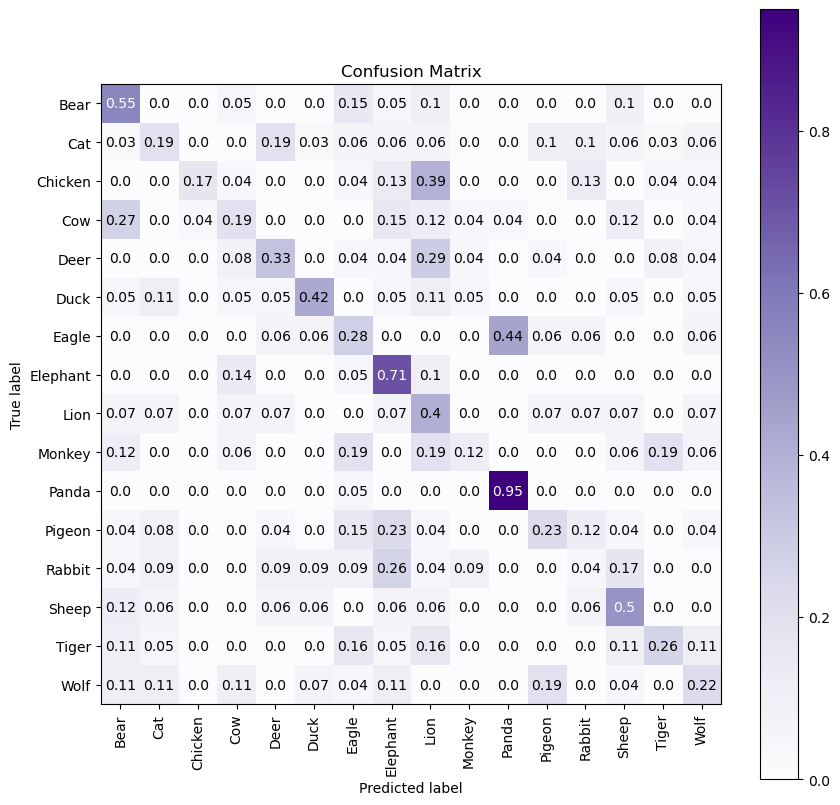

In [24]:
#اظهار رسم وتصور لقيم الدقة وضبط خصائص وأبعاد الشكل المرسوم
scikitplot.metrics.plot_confusion_matrix(y_test, # actual labels
pred, # predicted labels
title = "Confusion Matrix",#عنوان المصفوفة
cmap = "Purples",#خريطة ومدرج الألوان"أرجواني"
figsize = (10,10),#حجم الشكل المرسوم
x_tick_rotation = 90,
normalize = True # to print percentages # حساب النسبة المئوية لكل خلية بدلا من القيم الفعلية
)

In [25]:
#استخدام مصنف الانحدار التدرجي العشوائي وطباعة نتيجة الدقة
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier()
model_sgd.fit(X_train_flat, y_train)
pred=model_sgd.predict(X_test_flat)
accuracy_score(y_test,pred)

0.5348837209302325

In [26]:
#استخدام أداة (المحجم القياسي) لتحجيم البيانات 
#تستخدم هذه الأداة من أجل استخدام خوارزمية اس جي دي لكي تعمل بشكل جيد
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_flat_scaled = scaler.fit_transform(X_train_flat)
X_test_flat_scaled = scaler.fit_transform(X_test_flat)
#في هذا السطر يتم طباعة بيانات أول صورة قبل التحجيم
print(X_train_flat[0]) # the values of the first image pre-scaling
#في هذا السطر يتم طباعة بيانات الصورة الأولى بعد تحجيمها
print(X_train_flat_scaled[0]) # the values of the first image post-scaling

[ 44  20  11 ... 111 172 193]
[-1.09644254 -1.51351878 -1.25371842 ... -0.14735602  0.8425801
  1.36033156]


In [27]:
# هنا في هذا المقطع نقوم بتدريب نموذج جديد باستخدام مجموعات البيانات التي تم تحجيمها
model_sgd = SGDClassifier()
model_sgd.fit(X_train_flat_scaled, y_train)
pred=model_sgd.predict(X_test_flat_scaled)
accuracy_score(y_test,pred)#هنا يتم إظهار نتيجة الدقة للنموذج 

0.49709302325581395

In [44]:
# لتطبيق المخطط التكراري للتدرجات الموجهة نقوم بهذه الخطوات 
#أولا نستدعي دالة (rgb2gray())
# استيراد وظيفة تحويل الصور من ملونة (RGB) إلى رمادية
from skimage.color import rgb2gray

# تحويل بيانات التدريب إلى صور رمادية
X_train_gray = np.array([rgb2gray(img) for img in X_train])

# تحويل بيانات الاختبار إلى صور رمادية
X_test_gray = np.array([rgb2gray(img) for img in X_test])


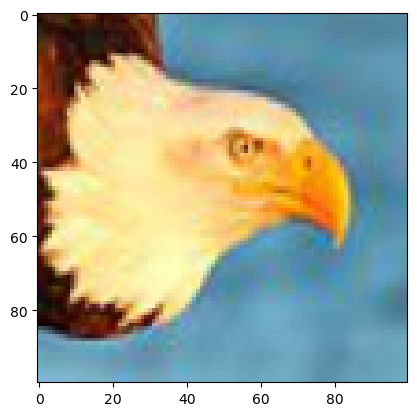

In [45]:
# عرض الصورة الأصلية قبل التحويل إلى تدرج الرمادي
plt.imshow(X_train[0]);

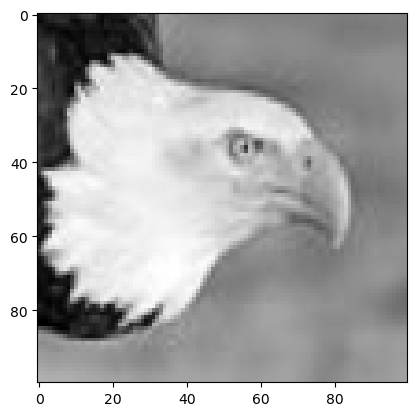

In [30]:
#عرض الصورة بعد تحويلها إلى درجة الرمادي
plt.imshow(X_train_gray[0],cmap='gray');

In [31]:
#طباعة أبعاد الصورتين
print(X_train_gray[0].shape)
print(X_train[0].shape)

(100, 100)
(100, 100, 3)


In [32]:
#hog باستخدام دالة
#الخطوة الثانية هي انشاء خصائص المدرج التكراري للتدرجات الموجهة لكل صورة في البيانات
from skimage.feature import hog
hog_vector, hog_img = hog(
        X_train_gray[0],
        visualize = True
)
hog_vector.shape
#هو متجه أحادي البعد ذو 8100 قيمة عددية hog-vector

(8100,)

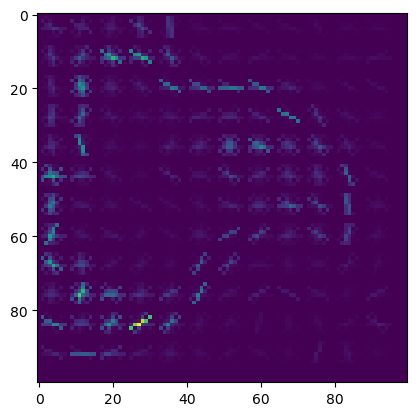

In [33]:
#اظهار الصورة بعد تطبيق الخوارزمية
plt.imshow(hog_img);

In [34]:
#في هذه التعليمات البرمجة يتم تطبيق التغيرات في الصور على بيانات التدريب وبيانات الاختبار
X_train_hog = np.array([hog(img) for img in X_train_gray])
X_test_hog = np.array([hog(img) for img in X_test_gray])

In [35]:
#في هذه التعليمات يتم تدريب خوارزمية مصنف الانحدار التدرجوي العشوائي على التمثيل الجديد للبيانات 
#SGDClassifierهو اسم المصنف 
#نلاحظ أن الدقة ارتفعت ووصلت إلى أكثر من سبعين بالمئة
# scales the new data
scaler = StandardScaler()
X_train_hog_scaled = scaler.fit_transform(X_train_hog)
X_test_hog_scaled = scaler.fit_transform(X_test_hog)
# trains a new model
model_sgd = SGDClassifier()
model_sgd.fit(X_train_hog_scaled, y_train)
# tests the model
pred = model_sgd.predict(X_test_hog_scaled)
accuracy_score(y_test,pred)

0.747093023255814

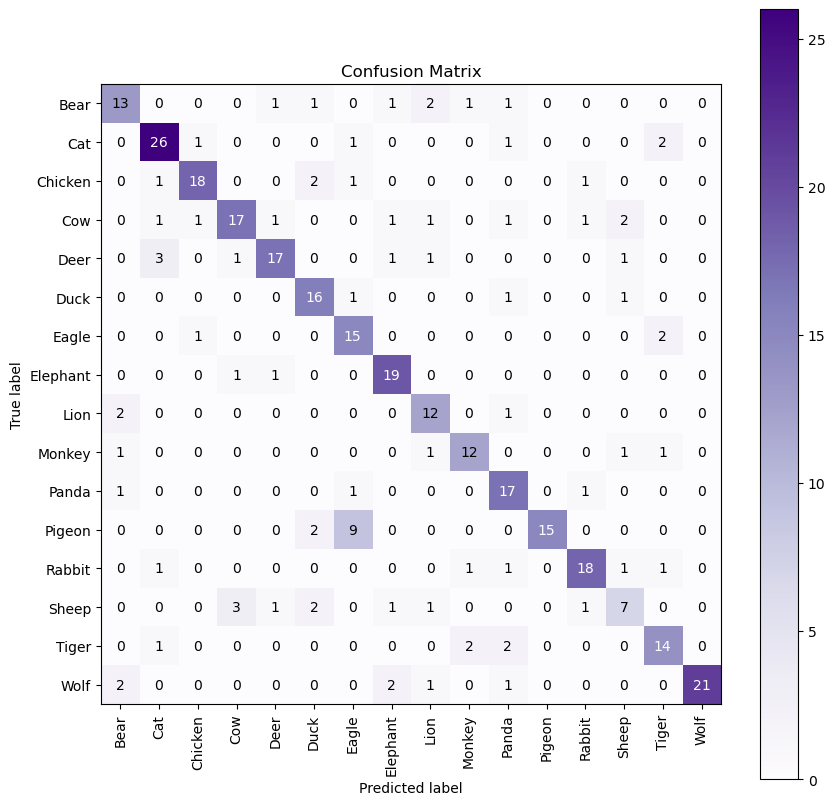

In [36]:
#نقوم بطباعة مصفوفة الدقة لأداء خوارزمية مصنف الانحدار التدرجي العشوائي 
# الهدف من ذلك هو اعطاء تصور واضح عن دقة الخوارمية 
scikitplot.metrics.plot_confusion_matrix(y_test, # actual labels
                        pred, # predicted labels
                        title = "Confusion Matrix", # title to use
                        cmap = "Purples", # color palette to use
                        figsize = (10,10), # figure size
                        x_tick_rotation = 90
);

In [37]:
%%capture
!pip install tensorflow
!pip install keras
#المقطع التالي يقوم بتثبيت المكتبات الخاصة بالشبكات العصبية

In [38]:
# في هذه التعليمات البرمجية يتم تحويل العناوين  إلى أرقام صحيحة كما تتطلب ذلك مكتبة كيرس
# gets the set of all distinct labels
classes=list(set(y_train))
print(classes)
print()
# replaces each label with an integer (its index in the classes lists) for both the training and testing data
y_train_num = np.array([classes.index(label) for label in y_train])
y_test_num = np.array([classes.index(label) for label in y_test])
print()
# example:
print(y_train[:5]) # first 5 labels
print(y_train_num[:5]) # first 5 labels in integer format

['Cow', 'Cat', 'Rabbit', 'Bear', 'Deer', 'Monkey', 'Sheep', 'Chicken', 'Elephant', 'Wolf', 'Lion', 'Eagle', 'Pigeon', 'Duck', 'Tiger', 'Panda']


['Eagle' 'Elephant' 'Wolf' 'Panda' 'Rabbit']
[11  8  9 15  2]


In [46]:
#3- استخدام أداة Sequential (التتابع) من مكتبة keras لبناء شبكة عصبية في شكل طبقات متتابعة :

from keras.models import Sequential # used to build neural networks as sequences of layers
# every neuron in a dense layer is connected to every other neuron in the previous layer.
from keras.layers import Dense
# builds a sequential stack of layers
model = Sequential()
# adds a dense hidden layer with 200 neurons, and the ReLU activation function.
model.add(Dense(200,input_shape = (X_train_hog.shape[1],), activation='relu'))
# adds a dense output layer and the softmax activation function.
model.add(Dense(len(classes), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               1620200   
                                                                 
 dense_3 (Dense)             (None, 16)                3216      
                                                                 
Total params: 1623416 (6.19 MB)
Trainable params: 1623416 (6.19 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
#هذا السطر يستخدم لتجميع النموذج
# compiling the model
model.compile(loss = 'sparse_categorical_crossentropy', metrics =
['accuracy'], optimizer = 'adam')

In [41]:
# هذه الدالة دالة فيت تستخدم لتدريب النموذج على البيانات المتاحة
model.fit(X_train_hog, # training data
    y_train_num, # labels in integer format
    batch_size = 80, # number of samples processed per batch
    epochs = 40, # number of iterations over the whole dataset
)

Epoch 1/40


18/18 [==============================] - 2s 23ms/step - loss: 2.2322 - accuracy: 0.3706
Epoch 2/40
18/18 [==============================] - 0s 22ms/step - loss: 1.1553 - accuracy: 0.7406
Epoch 3/40
18/18 [==============================] - 0s 23ms/step - loss: 0.7540 - accuracy: 0.8387
Epoch 4/40
18/18 [==============================] - 0s 22ms/step - loss: 0.5556 - accuracy: 0.8823
Epoch 5/40
18/18 [==============================] - 0s 23ms/step - loss: 0.4173 - accuracy: 0.9266
Epoch 6/40
18/18 [==============================] - 0s 22ms/step - loss: 0.3202 - accuracy: 0.9564
Epoch 7/40
18/18 [==============================] - 0s 22ms/step - loss: 0.2484 - accuracy: 0.9702
Epoch 8/40
18/18 [==============================] - 0s 23ms/step - loss: 0.2000 - accuracy: 0.9862
Epoch 9/40
18/18 [==============================] - 0s 22ms/step - loss: 0.1666 - accuracy: 0.9869
Epoch 10/40
18/18 [==============================] - 0s 22ms/step - loss: 0.1310 - accuracy: 0.9949
Epoch 1

In [42]:
# بعد الانهاء من تدريب النموذج يمكن من خلال هذا السطر استخدامه على مجموعة الاختبار ومعرفة الدقة
# سيظهر عند استخدام دارة بريكتيد مصفوفة باحتمالات كل العناوين المرشح 
pred = model.predict(X_test_hog)
pred[0] # prints the predictions for the first image

11/11 [==============================] - 0s 5ms/step


array([2.0271349e-04, 5.0487633e-05, 8.9090890e-06, 1.2086721e-03,
       7.4371892e-06, 6.3846852e-03, 6.8477719e-05, 2.9577145e-03,
       2.4115231e-03, 7.0850429e-04, 6.5039913e-04, 2.5454187e-04,
       2.6194277e-04, 9.8481905e-01, 1.0769862e-06, 3.8730577e-06],
      dtype=float32)

In [43]:
# هنا استخدمنا دالة ان بي ارماكس لا اضهار أكثر عنوان احتمالاً
#نلاحظ أن الدقة ارتفعت وأصبحت حوالي 75بالمية وهي دقة تشابه دقة المصنف السابق ولكن الشبكات الع
# index of the class with the highest predicted probability.
print(np.argmax(pred[0]))
# name of this class
print(classes[np.argmax(pred[0])])
# uses axis=1 to find the index of the max value per row
accuracy_score(y_test_num,np.argmax(pred, axis=1))

13
Duck


0.7877906976744186